# First analysis

This file aims to answers our first sub-questions for Milestone 1 of the project.

We will explore each question, and verify if we can answeer them using the data set

## 0) Importing the packages and data 

In [11]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
sns.set(style="whitegrid")

In [12]:
df_movie = pd.read_csv('../Datasets/movies_cleaned_dataset.csv')
df_movie.head()

,Movie_name,Release_Date,Movie_box_office_revenue,Movie_runtime,Main_genre,Main_language,Main_country,Plot_summary,tconst,averageRating,numVotes,Movie_languages,Movie_countries,Movie_genres,Estimated_Budget,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit
0,Ghosts of Mars,2001,14010832,98.0,Thriller,English Language,United States of America,"Set in the second half of the 22nd century, th...",tt0228333,4.9,56894.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",28000000,0,0,-13989168,-1.870336e+07
1,White Of The Eye,1987,0,110.0,Thriller,English Language,United Kingdom,A series of murders of rich young women throug...,tt0094320,6.1,2894.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",0,0,0,0,0.000000e+00
2,A Woman in Flames,1983,0,106.0,Drama,German Language,Germany,"Eva, an upper class housewife, becomes frustra...",tt0083949,5.9,623.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",0,0,0,0,0.000000e+00
3,The Sorcerer's Apprentice,2002,0,86.0,Family Film,English Language,South Africa,"Every hundred years, the evil Morgana returns...",NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",0,0,0,0,0.000000e+00
4,Aaah Belinda,1986,0,NaN,Comedy,Turkish Language,Turkey,"Serap, a young actress with a strong, lively p...",NaN,NaN,NaN,"{""/m/02hwyss"": ""Turkish Language""}","{""/m/01znc_"": ""Turkey""}","{""/m/01z4y"": ""Comedy""}",0,0,0,0,0.000000e+00


## 1) How do rating and revenue vary as a function of the genre?

## 2) Which relation between the screen time and the opportunity to win an award ?

We first consider all the movies who were nominated at the Oscar ceremony : we have 674 nominated movies. Several movies can be nominated, and there exist several categories of Oscar awards.

- The average screan time is 121 minutes. 
- We also observe that the mean release year is 1974.

In [13]:
# deleting extreme outliers for movie runtime
df_movie = df_movie[df_movie['Movie_runtime'] < 300] # 300 minutes is 5 hours

In [14]:
df_movie[df_movie['Nominations'] != 0].describe()

,Release_Date,Movie_box_office_revenue,Movie_runtime,averageRating,numVotes,Estimated_Budget,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit
count,667.000000,6.670000e+02,667.000000,648.000000,6.480000e+02,6.670000e+02,667.000000,667.000000,6.670000e+02,6.670000e+02
mean,1974.040480,9.727090e+07,120.940030,7.424074,1.908377e+05,1.754560e+07,1.920540,4.869565,7.972530e+07,1.823602e+08
std,23.047734,2.149108e+08,28.048424,0.598381,3.587106e+05,3.617073e+07,1.721088,3.229847,1.909044e+08,4.827873e+08
min,1934.000000,0.000000e+00,12.000000,5.700000,3.730000e+02,0.000000e+00,0.000000,1.000000,-2.000000e+08,-2.348670e+08
25%,1953.500000,0.000000e+00,103.000000,7.100000,1.054675e+04,0.000000e+00,1.000000,2.000000,0.000000e+00,0.000000e+00
50%,1975.000000,1.680000e+07,117.000000,7.500000,4.697900e+04,2.500000e+06,1.000000,4.000000,1.050000e+07,4.628116e+07
75%,1994.000000,9.593517e+07,132.000000,7.800000,1.975500e+05,1.737988e+07,2.000000,7.000000,7.707246e+07,1.976374e+08
max,2012.000000,2.782275e+09,250.000000,9.200000,2.797575e+06,2.370000e+08,11.000000,14.000000,2.545275e+09,6.822472e+09


We can also vizualise the number of awarded movies compared to the runtime

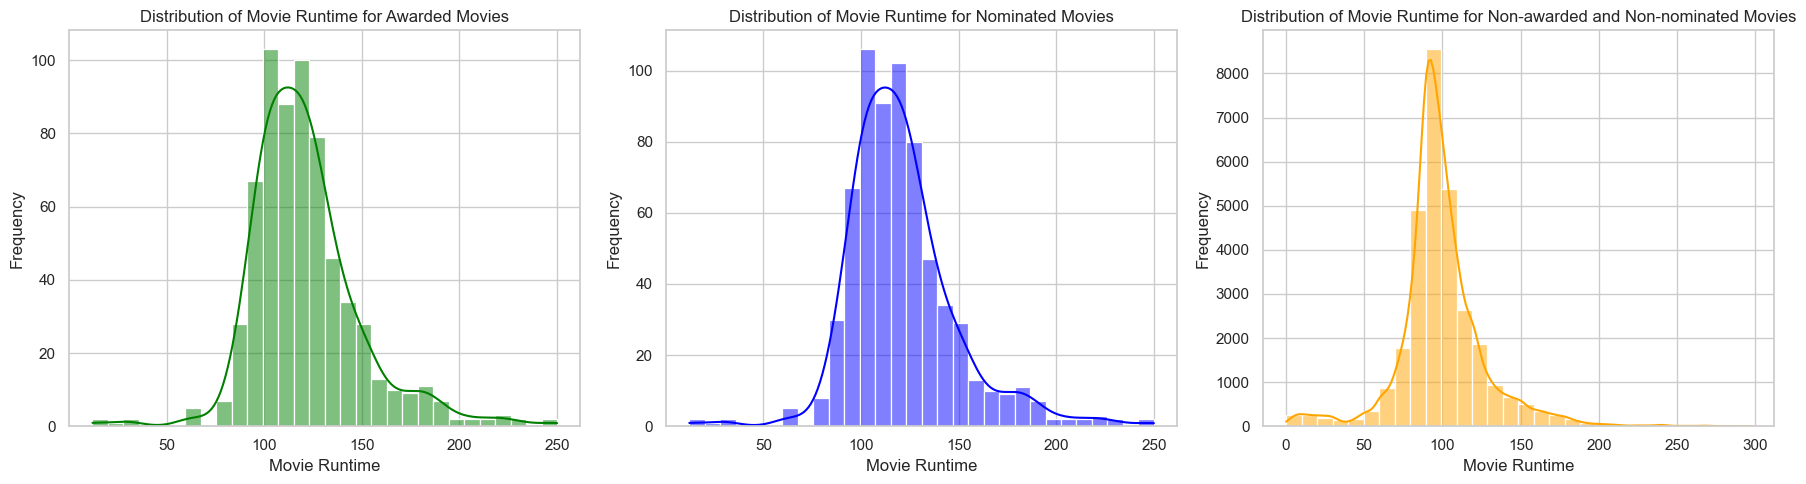

In [15]:
df_movie['Was_nominated'] = df_movie['Nominations'].apply(lambda x: 'Nominated' if x > 0 else 'Not Nominated')
df_movie['Was_awarded'] = df_movie['Oscar_Wins'].apply(lambda x: 'Awarded' if x > 0 else 'Not Awarded')

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot for Awarded Movies
sns.histplot(data=df_movie[df_movie['Was_awarded'] == 'Awarded'], x='Movie_runtime', bins=30, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution of Movie Runtime for Awarded Movies')
axes[0].set_xlabel('Movie Runtime')
axes[0].set_ylabel('Frequency')

# Plot for Nominated Movies
sns.histplot(data=df_movie[df_movie['Was_nominated'] == 'Nominated'], x='Movie_runtime', bins=30, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Distribution of Movie Runtime for Nominated Movies')
axes[1].set_xlabel('Movie Runtime')
axes[1].set_ylabel('Frequency')

# Plot for Non-nominated and Non-awarded Movies
non_awarded_nominated_movies = df_movie[(df_movie['Was_awarded'] == 'Not Awarded') & (df_movie['Was_nominated'] == 'Not Nominated')]
sns.histplot(data=non_awarded_nominated_movies, x='Movie_runtime', bins=30, kde=True, color='orange', ax=axes[2])
axes[2].set_title('Distribution of Movie Runtime for Non-awarded and Non-nominated Movies')
axes[2].set_xlabel('Movie Runtime')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


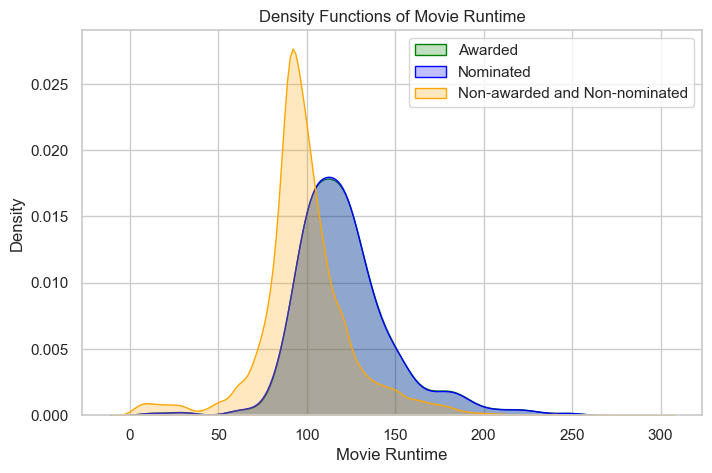

In [16]:
plt.figure(figsize=(8, 5))
# KDE Plot for Awarded Movies
sns.kdeplot(data=df_movie[df_movie['Was_awarded'] == 'Awarded'], x='Movie_runtime', fill=True, label='Awarded', color='green')
# KDE Plot for Nominated Movies
sns.kdeplot(data=df_movie[df_movie['Was_nominated'] == 'Nominated'], x='Movie_runtime', fill=True, label='Nominated', color='blue')
# KDE Plot for Non-nominated and Non-awarded Movies
non_awarded_nominated_movies = df_movie[(df_movie['Was_awarded'] == 'Not Awarded') & (df_movie['Was_nominated'] == 'Not Nominated')]
sns.kdeplot(data=non_awarded_nominated_movies, x='Movie_runtime', fill=True, label='Non-awarded and Non-nominated', color='orange')

# Set plot title and labels
plt.title('Density Functions of Movie Runtime', fontsize=12)
plt.xlabel('Movie Runtime')
plt.ylabel('Density')
plt.legend()
plt.show()


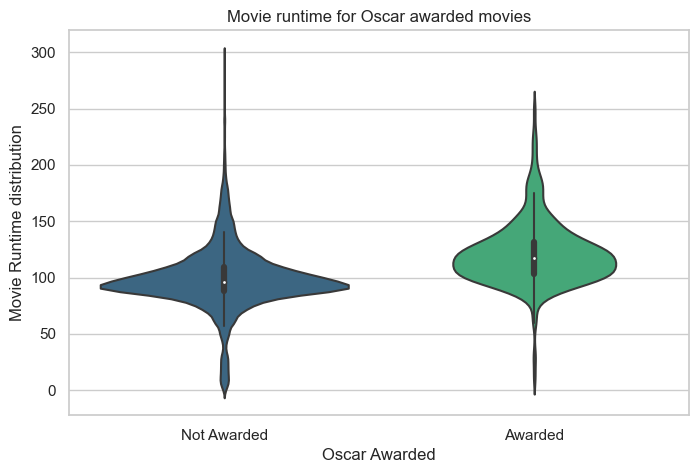

In [17]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Was_awarded', y='Movie_runtime', data=df_movie, palette='viridis')
plt.title('Movie runtime for Oscar awarded movies')
plt.ylabel('Movie Runtime distribution')
plt.xlabel('Oscar Awarded')
plt.show()

We can then use a linear regression between the number of nominations and the movie runtime

This driver seems not significant at all: $p_{value} =  0.985$

In [18]:
mod1 = smf.ols(formula='Nominations ~ Movie_runtime ', data=df_movie)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:            Nominations   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     559.7
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          1.16e-122
Time:                        21:41:47   Log-Likelihood:                -38771.
No. Observations:               31107   AIC:                         7.755e+04
Df Residuals:                   31105   BIC:                         7.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2988      0.018    -16.883

Oscar Awarded movies seem to be quite long : the mean and mediane  are around 120 minutes, which is 2h. 

In [20]:
df_movie.Movie_runtime.describe()

count    31107.000000
mean        99.350132
std         27.815107
min          0.300000
25%         88.000000
50%         96.000000
75%        110.000000
max        297.000000
Name: Movie_runtime, dtype: float64

## 3) What is the relation between being awarded and revenues

We have box office revenue data for  7433 movies.


/var/folders/rj/x8h6rfd922q9x6c_0kgfk7ch0000gn/T/ipykernel_8424/2672414047.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


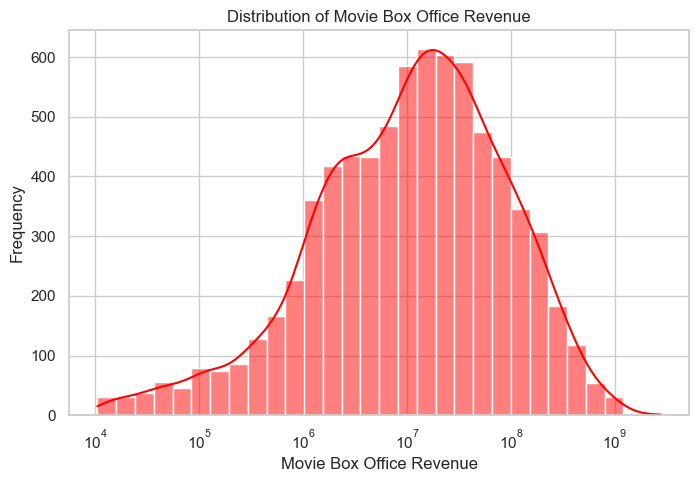

In [21]:
df_movie_revenues = df_movie[df_movie['Movie_box_office_revenue'] != 0]
print("We have box office revenue data for ",len(df_movie_revenues),"movies.")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_movie_revenues, x='Movie_box_office_revenue', bins=30, kde=True, color='red', log_scale=True)
plt.title('Distribution of Movie Box Office Revenue')
plt.xlabel('Movie Box Office Revenue')
plt.ylabel('Frequency')
fig.show()

We have inflation adjusted data for  6269 movies.


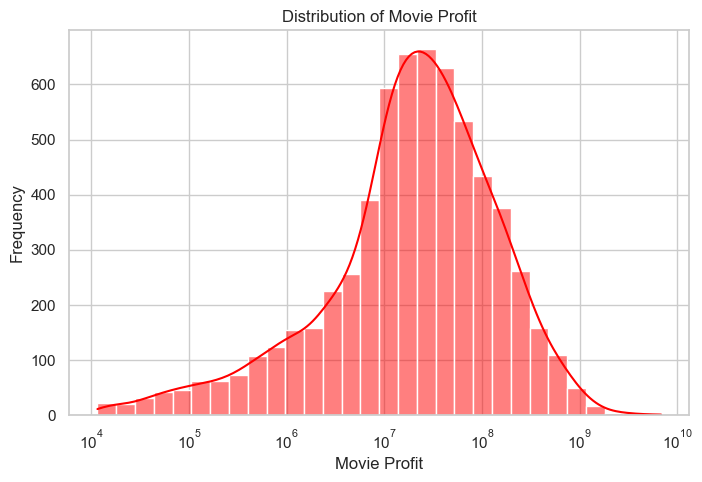

In [22]:
df_movie_profit = df_movie[df_movie['Inflation_adjusted_profit'] > 10000] # 10000 is the minimum profit
print("We have inflation adjusted data for ",len(df_movie_profit),"movies.")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_movie_profit, x='Inflation_adjusted_profit', bins=30, kde=True, color='red', log_scale=True)
plt.title('Distribution of Movie Profit')
plt.xlabel('Movie Profit')
plt.ylabel('Frequency')
plt.show()

/var/folders/rj/x8h6rfd922q9x6c_0kgfk7ch0000gn/T/ipykernel_8424/961978594.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_awarded_nominated_movies = df_movie_profit[(df_movie_profit['Was_awarded'] == 'Not Awarded') & (df_movie['Was_nominated'] == 'Not Nominated')]


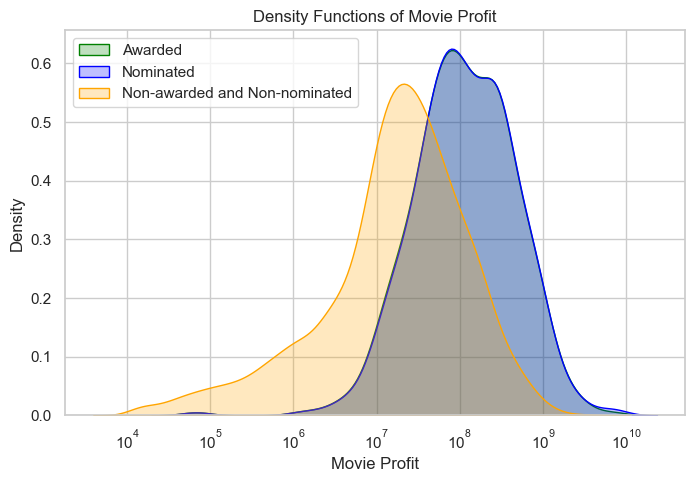

In [23]:
plt.figure(figsize=(8, 5))
# KDE Plot for Awarded Movies
sns.kdeplot(data=df_movie_profit[df_movie_profit['Was_awarded'] == 'Awarded'], x='Inflation_adjusted_profit', fill=True, label='Awarded', color='green', log_scale=True)
# KDE Plot for Nominated Movies
sns.kdeplot(data=df_movie_profit[df_movie_profit['Was_nominated'] == 'Nominated'], x='Inflation_adjusted_profit', fill=True, label='Nominated', color='blue',log_scale=True)
# KDE Plot for Non-nominated and Non-awarded Movies
non_awarded_nominated_movies = df_movie_profit[(df_movie_profit['Was_awarded'] == 'Not Awarded') & (df_movie['Was_nominated'] == 'Not Nominated')]
sns.kdeplot(data=non_awarded_nominated_movies, x='Inflation_adjusted_profit', fill=True, label='Non-awarded and Non-nominated', color='orange' , log_scale=True)

# Set plot title and labels
plt.title('Density Functions of Movie Profit', fontsize=12)
plt.xlabel('Movie Profit')
plt.ylabel('Density')
plt.legend( loc = 'upper left') 



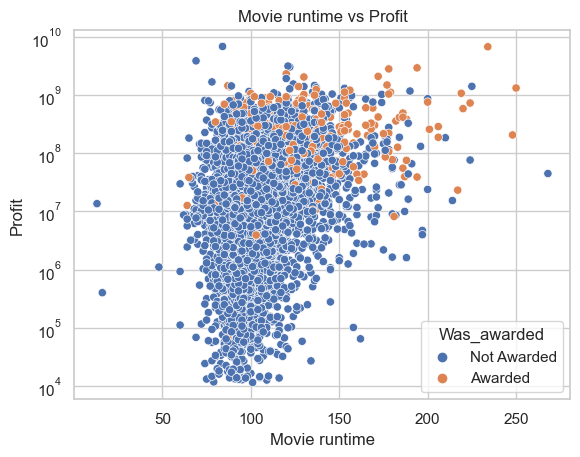

In [24]:
sns.scatterplot(data=df_movie_profit, x='Movie_runtime', y='Inflation_adjusted_profit', hue='Was_awarded')
plt.title('Movie runtime vs Profit')
plt.xlabel('Movie runtime')
plt.yscale('log') 
plt.ylabel('Profit')
plt.show()

## 4) What is the relationship between ratings and profit

We can observe that awarded movies have significantly higher profits and movie ratings.

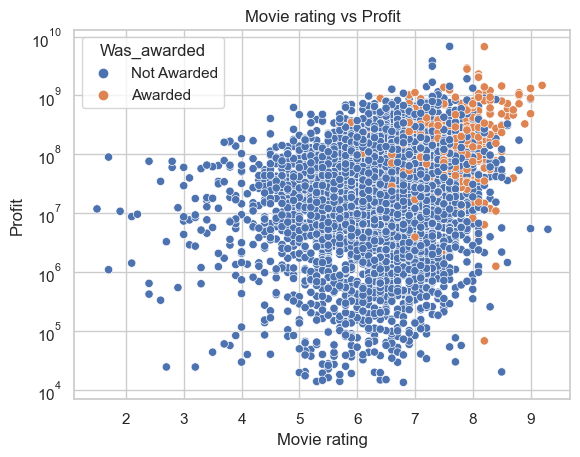

In [27]:
sns.scatterplot(data=df_movie_profit, x='averageRating', y='Inflation_adjusted_profit', hue='Was_awarded')
plt.title('Movie rating vs Profit')
plt.xlabel('Movie rating')
plt.yscale('log') 
plt.ylabel('Profit')
plt.show()

In [29]:
mod1 = smf.ols(formula='Inflation_adjusted_profit ~ averageRating ', data=df_movie)
res1 = mod1.fit()
print(res1.summary())

                                OLS Regression Results                               
Dep. Variable:     Inflation_adjusted_profit   R-squared:                       0.016
Model:                                   OLS   Adj. R-squared:                  0.016
Method:                        Least Squares   F-statistic:                     313.9
Date:                       Mon, 13 Nov 2023   Prob (F-statistic):           1.11e-69
Time:                               22:11:56   Log-Likelihood:            -3.8017e+05
No. Observations:                      18960   AIC:                         7.603e+05
Df Residuals:                          18958   BIC:                         7.604e+05
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------